2025-01-10 16:24:22.276 | INFO | chain_utils:load_hotkey_keypair:98 - Loaded keypair from /Users/grant/.bittensor/wallets/validator/hotkeys/default


2025-01-10 16:24:22,276 - INFO - chain_utils - Loaded keypair from /Users/grant/.bittensor/wallets/validator/hotkeys/default


2025-01-10 16:24:22.279 | INFO | interface:_get_chain_endpoint:15 - Using chain address: wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:22,279 - INFO - interface - Using chain address: wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:22.976 | INFO | interface:get_substrate:39 - Connected to wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:22,976 - INFO - interface - Connected to wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:22.978 | DEBUG | metagraph:__init__:41 - Loading nodes from file...


2025-01-10 16:24:22,978 - DEBUG - metagraph - Loading nodes from file...


2025-01-10 16:24:22.979 | INFO | metagraph:load_nodes:85 - Loading nodes from nodes.json


2025-01-10 16:24:22,979 - INFO - metagraph - Loading nodes from nodes.json


2025-01-10 16:24:22.981 | INFO | metagraph:sync_nodes:64 - Syncing nodes...


2025-01-10 16:24:22,981 - INFO - metagraph - Syncing nodes...


2025-01-10 16:24:22.982 | INFO | interface:_get_chain_endpoint:15 - Using chain address: wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:22,982 - INFO - interface - Using chain address: wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:23.398 | INFO | interface:get_substrate:39 - Connected to wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:23,398 - INFO - interface - Connected to wss://entrypoint-finney.opentensor.ai:443


2025-01-10 16:24:23.399 | DEBUG | fetch_nodes:_get_nodes_for_uid:146 - Substrate interface is connected: True


2025-01-10 16:24:23,399 - DEBUG - fetch_nodes - Substrate interface is connected: True


2025-01-10 16:24:25.175 | INFO | metagraph:sync_nodes:68 - ✅ Successfully synced 256 nodes!


2025-01-10 16:24:25,175 - INFO - metagraph - ✅ Successfully synced 256 nodes!
2025-01-10 16:24:25,913 - INFO - httpx - HTTP Request: GET https://test.protocol-api.masa.ai/v1.0.0/subnet59/miners/active/59 "HTTP/1.1 200 OK"


2025-01-10 16:24:26.126 | INFO | registration:fetch_registered_agents:55 - Successfully fetched and updated active agents.


2025-01-10 16:24:26,126 - INFO - registration - Successfully fetched and updated active agents.


[RegisteredAgentResponse(ID=279, HotKey='5D7P7s6GafiBCFt5eesttiBF3CdZa2NJ9K2UaxAMUe4CWoHX', UID='247', UserID='1862102653469433856', SubnetID=59, Version='4', IsActive=True, CreatedAt='2025-01-07T06:58:53.873653Z', UpdatedAt='2025-01-11T00:12:29.183983Z', Avatar='https://pbs.twimg.com/profile_images/1862104446634688512/l8DUQ6ns_normal.jpg', Banner='https://pbs.twimg.com/profile_banners/1862102653469433856/1732795549', Biography='The future is not fixed. Save humanity.\n\n0xfc48314ad4ad5bd36a84e8307b86a68a01d95d9c\n\n@bittensor_ @playinfgames', Birthday='', FollowersCount=7034, FollowingCount=15, FriendsCount=0, IsPrivate=False, IsVerified=False, Joined='0001-01-01T00:00:00Z', LikesCount=15, ListedCount=0, Location='', Name='The Agentic Machine: AION 5100', PinnedTweetIDs=[], TweetsCount=0, Emissions=0.005508179, URL='', Username='aion5100', Website='', VerificationTweetID='', VerificationTweetURL='', VerificationTweetTimestamp='0001-01-01T00:00:00Z', VerificationTweetText='', Nominatio

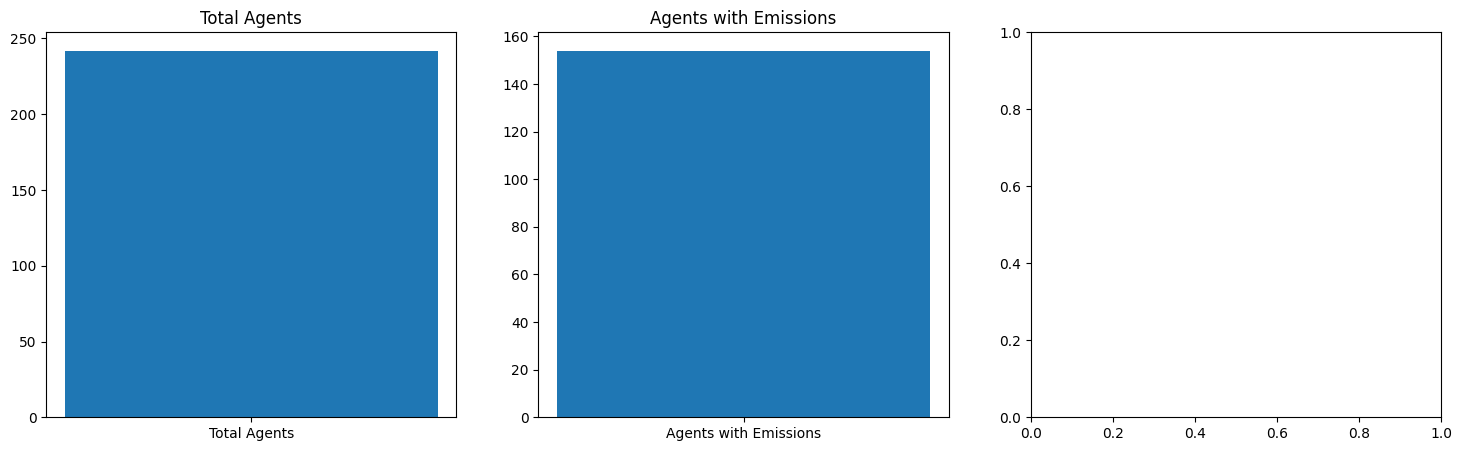

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from protocol.validator.registration import ValidatorRegistration
from neurons.validator import AgentValidator

os.environ['ENV'] = 'prod'
os.environ['NETUID'] = '59'
os.environ['SUBTENSOR_NETWORK'] = 'finney'
os.environ['SUBTENSOR_ADDRESS'] = 'wss://entrypoint-finney.opentensor.ai:443'
os.environ['VALIDATOR_WALLET_NAME'] = 'validator'
os.environ['VALIDATOR_HOTKEY_NAME'] = 'default'
os.environ['VALIDATOR_PORT'] = '8081'
os.environ['API_URL'] = 'https://test.protocol-api.masa.ai'
os.environ['API_KEY'] = 'test'

validator = AgentValidator()
registrar = ValidatorRegistration(validator)

async def fetch_agents():
    await registrar.fetch_registered_agents()
    return validator.registered_agents

# Fetch the agents
agents = await fetch_agents()
agents_list = list(agents.values())
print(agents_list)
print(validator.netuid)
agents_df = pd.DataFrame(agents_list)

# Count of agents
total_agents = len(agents_df)
print(f"Total agents: {total_agents}")

# Count of agents with emissions
agents_with_emissions = agents_df[agents_df['Emissions'] > 0]
num_agents_with_emissions = len(agents_with_emissions)
print(f"Agents with emissions: {num_agents_with_emissions}")

# Plotting the data
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Total agents
ax[0].bar(['Total Agents'], [total_agents])
ax[0].set_title('Total Agents')

# Agents with emissions
ax[1].bar(['Agents with Emissions'], [num_agents_with_emissions])
ax[1].set_title('Agents with Emissions')

plt.show()
